In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#01. Create Line : $y$ =  $\theta$$_0$$x$ + $\theta$$_1$  

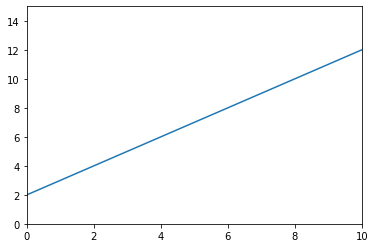

In [8]:
#if theta 0 = 1 and theta 1 = 2
def hypothesis(t1, t2, x):
  return t1 * x + t2
#np.random.randn
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = hypothesis(1, 2, x)

plt.plot(x, y)
plt.axis([0,10,0,15])
plt.show()

#02. Create plots (Using Gausian Random)

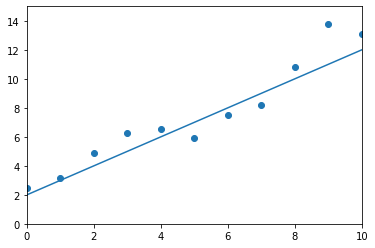

In [32]:
#정규분포를 변경한 과정도 github에 추가하자

#2-1.
def create_Rand(x1, y):
  return y + np.random.normal(0, 1, y.size)

y_2 = create_Rand(x, y)

plt.plot(x, y)
plt.scatter(x, y_2)
plt.axis([0,10,0,15])
plt.show()
